In [1]:
import os
import zipfile
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Epoch 1/10
19/19 [==============================] - 58s 3s/step - loss: 0.7027 - accuracy: 0.6168 - val_loss: 0.6365 - val_accuracy: 0.6184
Epoch 2/10
19/19 [==============================] - 53s 3s/step - loss: 0.6281 - accuracy: 0.6579 - val_loss: 0.6220 - val_accuracy: 0.6316
Epoch 3/10
19/19 [==============================] - 53s 3s/step - loss: 0.6221 - accuracy: 0.6678 - val_loss: 0.6137 - val_accuracy: 0.7105
Epoch 4/10
19/19 [==============================] - 54s 3s/step - loss: 0.6317 - accuracy: 0.6826 - val_loss: 0.5954 - val_accuracy: 0.7171
Epoch 5/10
19/19 [==============================] - 66s 3s/step - loss: 0.6026 - accuracy: 0.7007 - val_loss: 0.6269 - val_accuracy: 0.6579
Epoch 6/10
19/19 [==============================] - 63s 3s/step - loss: 0.6014 - accuracy: 0.6957 - val_loss: 0.5565 - val_accuracy: 0.6974
Epoch 7/10
19/19 [==============================] - 60s 3s/step - loss: 0.5728 - accuracy: 0.7023 - val_loss: 0.5345 - val_accuracy: 0.6776
Epoch 8/10
19/19 [==

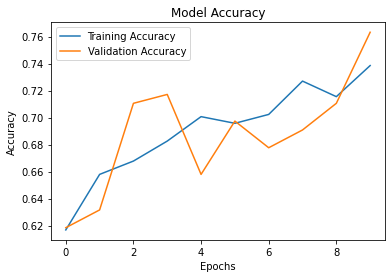

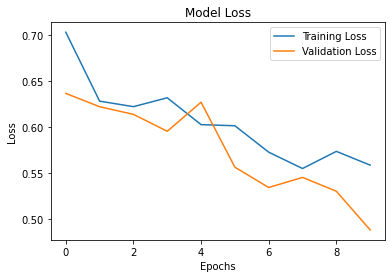

C:\Users\KBLEE\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 4s 701ms/step
Classification Report:
              precision    recall  f1-score   support

      Normal       0.75      0.91      0.83        94
      Severe       0.79      0.52      0.62        58

    accuracy                           0.76       152
   macro avg       0.77      0.72      0.73       152
weighted avg       0.77      0.76      0.75       152

Confusion Matrix:
[[86  8]
 [28 30]]


In [2]:
# 이미지 경로 및 압축 해제 경로
normal_zip_path = r'D:/E3_Writer/출판프로젝트/디지털북스_챗GPT데이터분석/C_원고/8장_데이터모음/8_03/JPN/CNNTrying/IDC_Normalized_Augmented_Normal_492.zip'
severe_zip_path = r'D:/E3_Writer/출판프로젝트/디지털북스_챗GPT데이터분석/C_원고/8장_데이터모음/8_03/JPN/CNNTrying/IDC_Normalized_Augmented_Severe_268.zip'
normal_extract_path = r'D:/E3_Writer/출판프로젝트/디지털북스_챗GPT데이터분석/C_원고/8장_데이터모음/8_03/JPN/CNNTrying//normal_images'
severe_extract_path = r'D:/E3_Writer/출판프로젝트/디지털북스_챗GPT데이터분석/C_원고/8장_데이터모음/8_03/JPN/CNNTrying//severe_images'

# 압축 파일 해제
with zipfile.ZipFile(normal_zip_path, 'r') as normal_zip_ref:
    normal_zip_ref.extractall(normal_extract_path)

with zipfile.ZipFile(severe_zip_path, 'r') as severe_zip_ref:
    severe_zip_ref.extractall(severe_extract_path)

# 이미지 로드 함수
def load_images(image_path, label, image_size=(256, 256)):
    images = []
    labels = []
    for filename in os.listdir(image_path):
        img_path = os.path.join(image_path, filename)
        img = Image.open(img_path).convert('L')  # 그레이스케일 변환
        img = img.resize(image_size)
        img_array = np.array(img) / 255.0  # 0-1 사이로 정규화
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# 정상 및 중증 환자 이미지 불러오기
normal_images, normal_labels = load_images(normal_extract_path, 0)  # 정상인은 라벨 0
severe_images, severe_labels = load_images(severe_extract_path, 1)  # 중증 환자는 라벨 1

# 데이터셋 합치기
X = np.concatenate((normal_images, severe_images), axis=0)
y = np.concatenate((normal_labels, severe_labels), axis=0)

# 데이터셋에 채널 추가 (CNN은 4차원 입력을 필요로 함)
X = X.reshape(-1, 256, 256, 1)

# 학습/테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 라벨 원-핫 인코딩
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2개의 클래스(정상 및 환자)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)

# 모델 학습
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=10)

# 모델 성능 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 저장
model.save('cnn_image_classification_model.h5')

# 테스트 데이터로 예측
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# 성능 평가
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=["Normal", "Severe"]))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

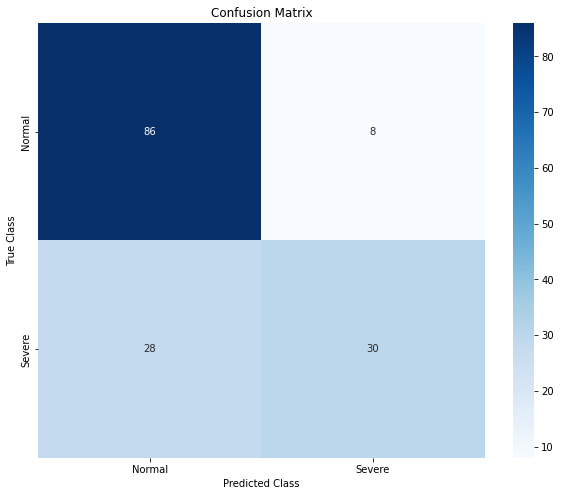

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 혼동 행렬 생성
cm = confusion_matrix(true_classes, predicted_classes)

# 시각화를 위한 설정
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Severe"], yticklabels=["Normal", "Severe"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


## 하이퍼 튜닝

Epoch 1/10
19/19 [==============================] - 63s 3s/step - loss: 0.8242 - accuracy: 0.5888 - val_loss: 0.6615 - val_accuracy: 0.6184
Epoch 2/10
19/19 [==============================] - 63s 3s/step - loss: 0.6414 - accuracy: 0.6497 - val_loss: 0.6440 - val_accuracy: 0.6184
Epoch 3/10
19/19 [==============================] - 62s 3s/step - loss: 0.6248 - accuracy: 0.6546 - val_loss: 0.6168 - val_accuracy: 0.6382
Epoch 4/10
19/19 [==============================] - 48s 3s/step - loss: 0.6203 - accuracy: 0.6612 - val_loss: 0.5944 - val_accuracy: 0.6250
Epoch 5/10
19/19 [==============================] - 47s 2s/step - loss: 0.6097 - accuracy: 0.7072 - val_loss: 0.6374 - val_accuracy: 0.6382
Epoch 6/10
19/19 [==============================] - 47s 2s/step - loss: 0.6026 - accuracy: 0.6941 - val_loss: 0.5720 - val_accuracy: 0.7171
Epoch 7/10
19/19 [==============================] - 64s 3s/step - loss: 0.6040 - accuracy: 0.6891 - val_loss: 0.5539 - val_accuracy: 0.6842
Epoch 8/10
19/19 [==

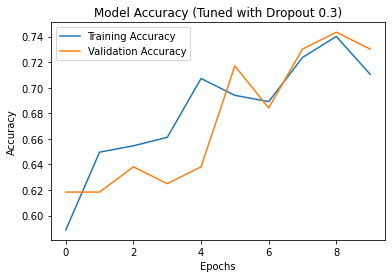

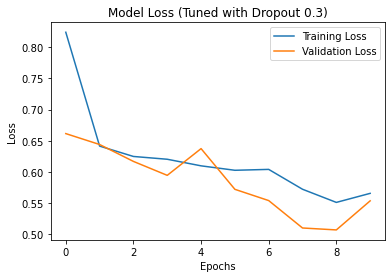

5/5 [==============================] - 3s 577ms/step
Classification Report (Tuned):
              precision    recall  f1-score   support

      Normal       0.70      0.98      0.82        94
      Severe       0.90      0.33      0.48        58

    accuracy                           0.73       152
   macro avg       0.80      0.65      0.65       152
weighted avg       0.78      0.73      0.69       152



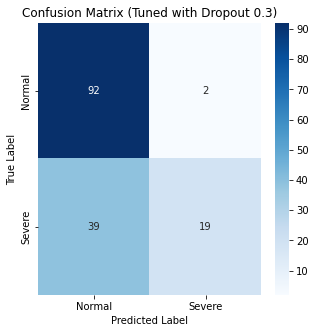

In [9]:
# CNN 모델 정의 (Dropout 비율을 0.3으로 조정)
model_tuned = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout 비율을 0.3으로 조정
    Dense(2, activation='softmax')  # 2개의 클래스(정상 및 환자)
])

# 모델 컴파일
model_tuned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history_tuned = model_tuned.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=10)

# 성능 시각화 (기존 코드와 동일)
plt.plot(history_tuned.history['accuracy'], label='Training Accuracy')
plt.plot(history_tuned.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Tuned with Dropout 0.3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_tuned.history['loss'], label='Training Loss')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Tuned with Dropout 0.3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 테스트 데이터로 예측
predictions_tuned = model_tuned.predict(X_test)
predicted_classes_tuned = np.argmax(predictions_tuned, axis=1)
true_classes_tuned = np.argmax(y_test, axis=1)

# 성능 평가
print("Classification Report (Tuned):")
print(classification_report(true_classes_tuned, predicted_classes_tuned, target_names=["Normal", "Severe"]))

# 혼동 행렬 시각화
conf_matrix_tuned = confusion_matrix(true_classes_tuned, predicted_classes_tuned)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Severe"], yticklabels=["Normal", "Severe"])
plt.title('Confusion Matrix (Tuned with Dropout 0.3)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
